In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', 500)
sns.set_context('talk', font_scale=1.2)
sns.set_palette('Set2')


Dataset: [link](https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption)

In [95]:
# !conda install fastparquet -y

In [96]:
def read_data(place = 'DEOK'):
    df = pd.read_csv(f'data/{place}_hourly.csv')
    df.columns = ['Date', 'MW']
    df['dt'] = pd.to_datetime(df['Date'])
    df['dow'] = df['dt'].dt.dayofweek
    df['doy'] = df['dt'].dt.dayofyear
    df['year'] = df['dt'].dt.year
    df['month'] = df['dt'].dt.month
    df['hour'] = df['dt'].dt.hour
    df['date'] = df['dt'].dt.date 



    return df

In [97]:
df = read_data(place = 'DEOK')

<AxesSubplot:xlabel='dt', ylabel='MW'>

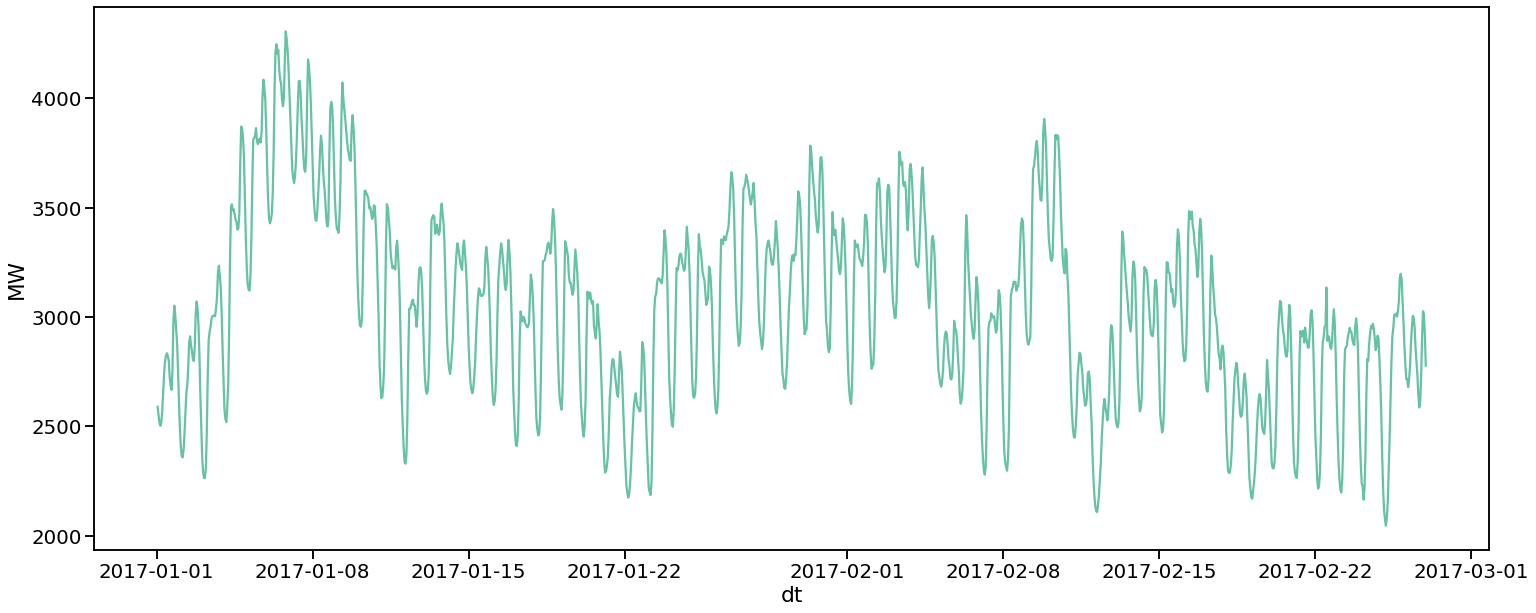

In [98]:
fig,  ax =  plt.subplots( figsize = (25,10))
sns.lineplot(data=df.query('dt>"2017-01-01" & dt<"2017-02-27"'), x='dt', y='MW', ax = ax)

/Users/s.bykov/opt/anaconda3/envs/venv_ml/lib/python3.9/site-packages/seaborn/relational.py:943: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try lineplot
  warnings.warn(msg, UserWarning)
/Users/s.bykov/opt/anaconda3/envs/venv_ml/lib/python3.9/site-packages/seaborn/relational.py:943: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try lineplot
  warnings.warn(msg, UserWarning)


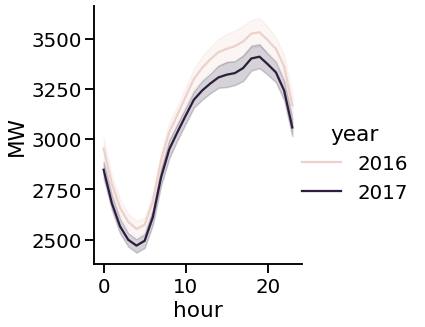

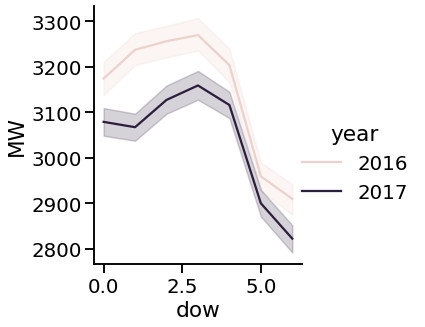

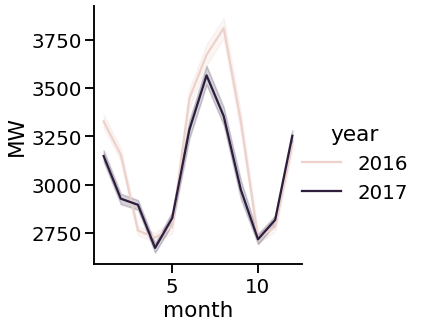

In [99]:
#fig,  ax =  plt.subplots( figsize = (25,10))
sns.relplot(data=df.query('year in [2017,2016]'), x='hour', y='MW', kind='line', hue = 'year')
sns.relplot(data=df.query('year in [2017,2016]'), x='dow', y='MW', kind='line', hue = 'year', ax = ax)
sns.relplot(data=df.query('year in [2017,2016]'), x='month', y='MW', kind='line', hue = 'year', ax = ax)


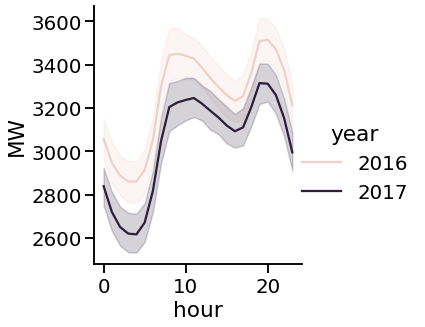

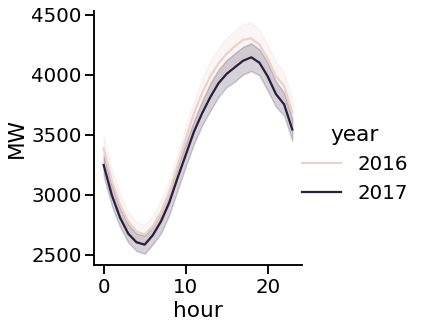

In [100]:
sns.relplot(data=df.query('year in [2017,2016] & month in [1, 2]'), x='hour', y='MW', kind='line', hue = 'year')
sns.relplot(data=df.query('year in [2017,2016] & month in [6,7]'), x='hour', y='MW', kind='line', hue = 'year')


<AxesSubplot:xlabel='month', ylabel='MW'>

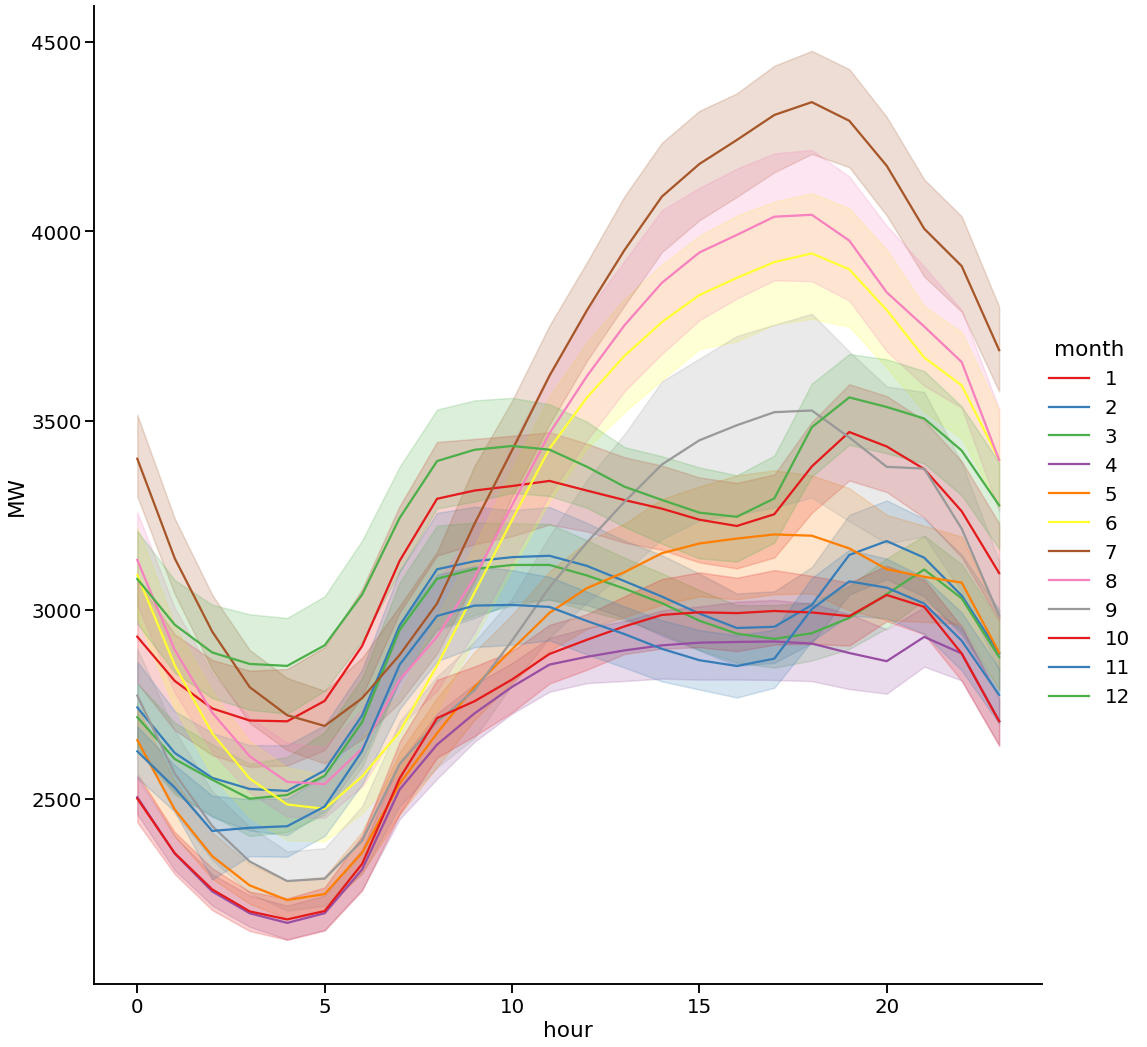

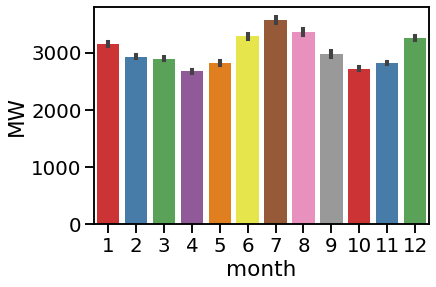

In [111]:
sns.relplot(data=df.query('year in [2017] '), x='hour', y='MW', kind='line', hue = 'month', palette = 'Set1', height=15)
plt.figure()
sns.barplot(data=df.query('year in [2017]'), x='month', y='MW', palette = 'Set1')